In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from tqdm.notebook import tqdm

In [2]:
in_file = '../data/processed/stats.pkl'
with open(in_file, 'rb') as f:
    contents = pickle.load(f)    

In [3]:
usernames = contents['usernames']
features = contents['features']
stats = contents['stats']

In [4]:
len(usernames), stats.shape

(1938253, (1938253, 72))

In [5]:
features = {feature: i for i, feature in enumerate(features)}

In [6]:
attack_levels = stats[:, features['attack_level']]

In [7]:
np.min(attack_levels)

-1

In [8]:
np.sum(attack_levels == -1)

48

In [9]:
attack_levels[attack_levels == -1] = 1

In [10]:
len(attack_levels)

1938253

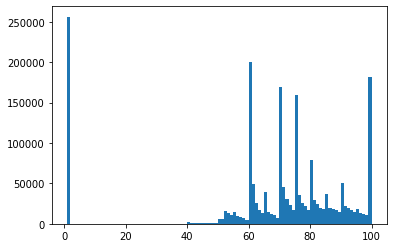

In [11]:
plt.hist(attack_levels, bins=np.arange(1, 101))
plt.show()

In [12]:
def plot_skill_hist(skill):
    feature = skill + '_level'
    levels = stats[:, features[feature]]
    levels = levels[levels > 0]
    plt.figure(figsize=(12, 8))
    plt.hist(levels, bins=np.arange(1, 101)) # [1, 2), [2, 3), ..., [99, 100]
    plt.yscale('log')
    plt.show()

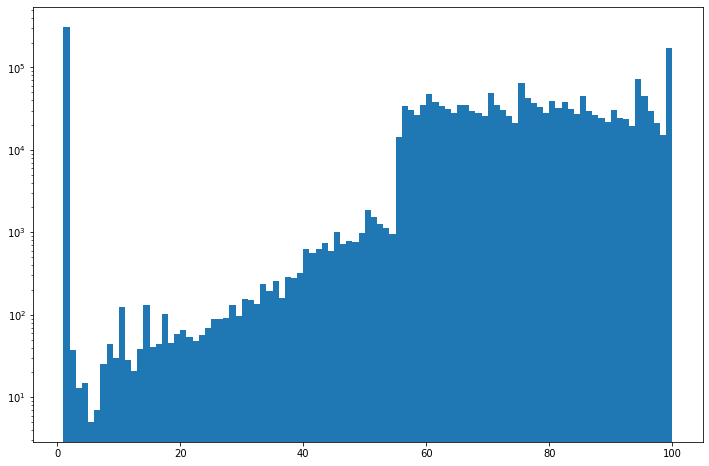

In [13]:
plot_skill_hist('magic')

In [14]:
att_lvls = stats[:, features['attack_level']]
att_keep_inds = att_lvls > 0
str_lvls = stats[:, features['strength_level']]
str_keep_inds = str_lvls > 0
def_lvls = stats[:, features['defence_level']]
def_keep_inds = def_lvls > 0
keep_inds = np.logical_and(att_keep_inds, str_keep_inds, def_keep_inds)
att_lvls = att_lvls[keep_inds]
str_lvls = str_lvls[keep_inds]
def_lvls = def_lvls[keep_inds]

In [15]:
att_str_corr = pearsonr(att_lvls, str_lvls)
def_str_corr = pearsonr(def_lvls, str_lvls)
print(att_str_corr)
print(def_str_corr)

(0.7674301956868808, 0.0)
(0.5974771582039458, 0.0)


In [16]:
23*23

529

In [17]:
import csv
with open('../reference/skills.csv', 'r') as f:
    reader = csv.reader(f)
    skills = [line[0] for line in reader]

In [18]:
skills

['total',
 'attack',
 'defence',
 'strength',
 'hitpoints',
 'ranged',
 'prayer',
 'magic',
 'cooking',
 'woodcutting',
 'fletching',
 'fishing',
 'firemaking',
 'crafting',
 'smithing',
 'mining',
 'herblore',
 'agility',
 'thieving',
 'slayer',
 'farming',
 'runecraft',
 'hunter',
 'construction']

In [19]:
def correlate_skills(skill_a, skill_b):
    levels_a = stats[:, features[skill_a + '_level']]
    levels_b = stats[:, features[skill_b + '_level']]
    keep_inds_a = levels_a > 0
    keep_inds_b = levels_b > 0
    keep_inds = np.logical_and(keep_inds_a, keep_inds_b)
    levels_a = levels_a[keep_inds]
    levels_b = levels_b[keep_inds]
    r_value, _ = pearsonr(levels_a, levels_b)
    return r_value

In [20]:
r_matrix = np.zeros((len(skills), len(skills)))

with tqdm(total=529) as progress_bar:
    for i, skill_i in enumerate(skills):
        for j, skill_j in enumerate(skills):
            if i > j:
                progress_bar.update(1)
                continue
            r = correlate_skills(skill_i, skill_j)
            r_matrix[i, j] = r
            r_matrix[j, i] = r

            progress_bar.update(1)

  0%|          | 0/529 [00:00<?, ?it/s]

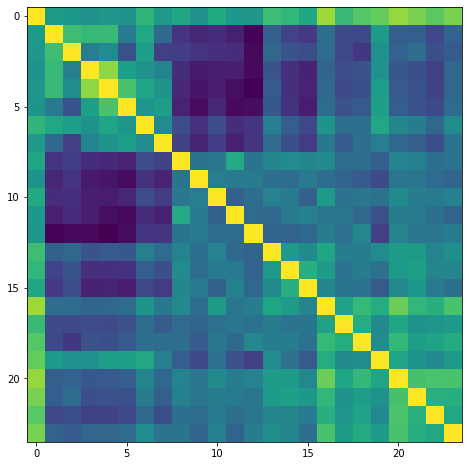

In [21]:
plt.figure(figsize=(8, 8))
plt.imshow(r_matrix)
plt.show()